<a href="https://colab.research.google.com/github/bithi-6535/bithi-6535/blob/main/ML_on_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Iris.csv")

In [4]:
print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
y=df.Species
x=df.iloc[:, :-1]


In [8]:
print(x.shape)
print(y.shape)
x.head()

(150, 5)
(150,)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [10]:
rf_model=RandomForestClassifier(random_state=0)
cv_scores=cross_val_score(rf_model,x,y,cv=5, scoring='accuracy')
print("Cross-validation scores:",cv_scores)
print("Mean CV accuracy:",cv_scores.mean())


Cross-validation scores: [1.         1.         1.         1.         0.93333333]
Mean CV accuracy: 0.9866666666666667


In [2]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import OrdinalEncoder

#y = y.values.reshape(-1,1)
ordinal_encoder=OrdinalEncoder()
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,
                                               random_state=0,
                                               test_size=0.8)
model=xgb.XGBClassifier(tree_method="hist",early_stopping_rounds=2)
model.fit(x_train, y_train, eval_set=[(x_test,y_test)])
train_score=model.score(x_train,y_train)
test_score=model.score(x_test,y_test)
print("Train accuracy: {train_score:.3f}")
print("Test accuracy:{test_score:.3f}")


NameError: name 'x' is not defined

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score


In [7]:
df=pd.read_csv("/content/drive/MyDrive/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [9]:
df['Species'].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [12]:
print("\n Descriptive statistics:")
df.describe()


 Descriptive statistics:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [16]:
df.notnull().sum()

,0
Id,150
SepalLengthCm,150
SepalWidthCm,150
PetalLengthCm,150
PetalWidthCm,150
Species,150


<Axes: xlabel='Species', ylabel='count'>

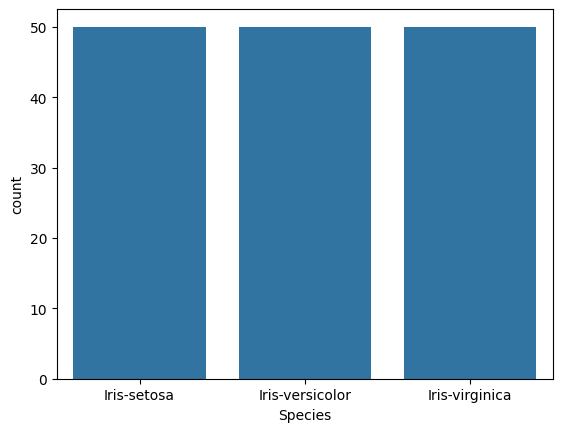

In [18]:
sns.countplot(x='Species',data=df)

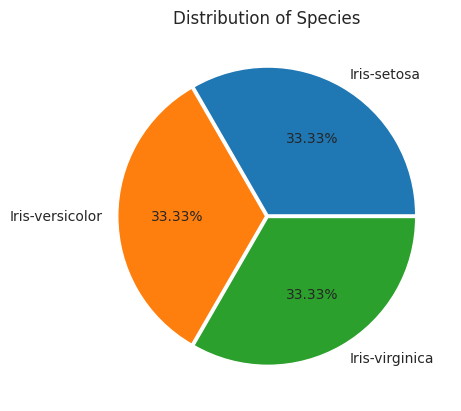

In [21]:
y=df['Species'].value_counts().tolist()
my_labels=df['Species'].unique().tolist()
my_explode=[0.01,0.01,0.01]
plt.pie(y, labels=my_labels, explode=my_explode, autopct='%1.2f%%')
sns.set_style("white")
plt.title('Distribution of Species')
plt.show()

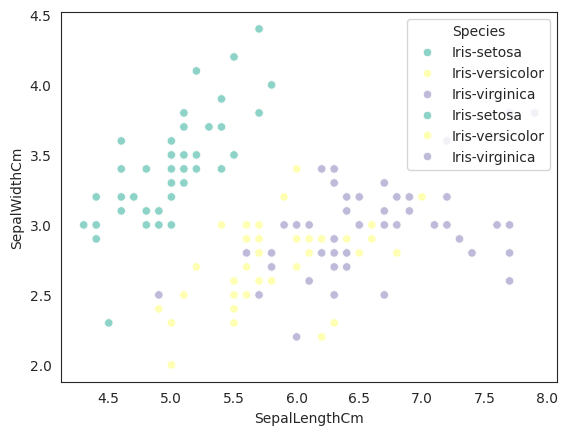

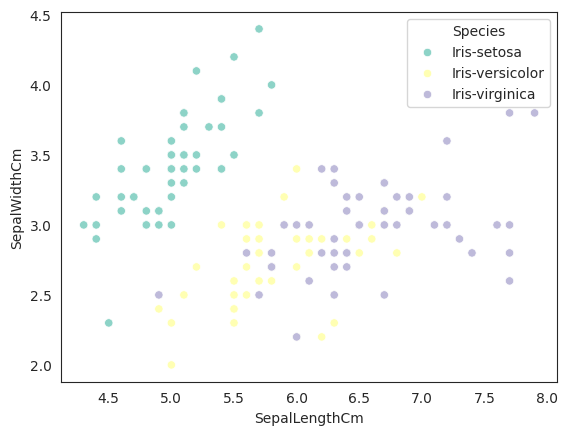

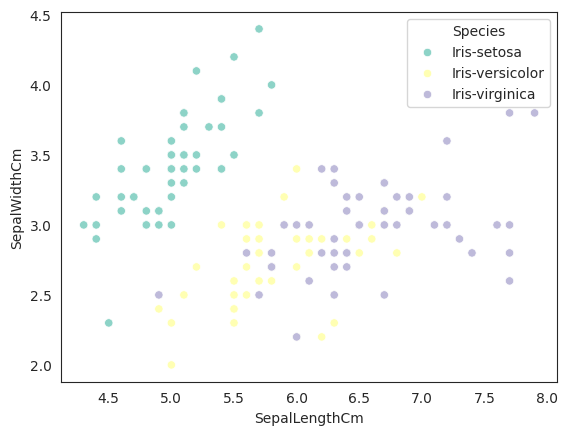

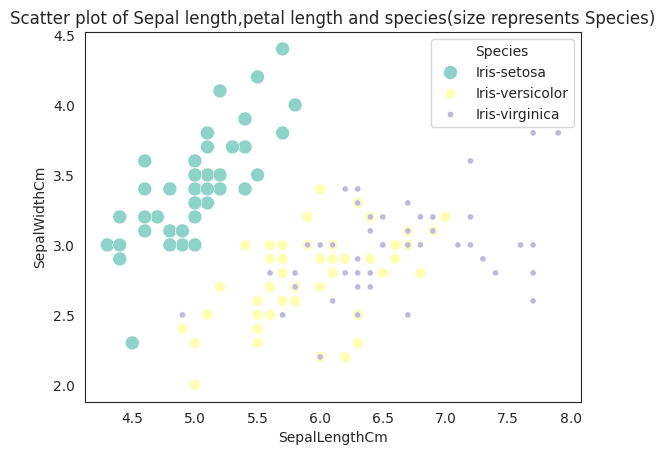

In [36]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df,
                palette="Set3")
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df,
                palette="Set3")
plt.show()

sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species',
                data=df, palette='Set3', sizes=(20,100))
plt.show()
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species', data=df,
                palette='Set3')
plt.show()
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',hue='Species',data=df,
                size='Species',palette='Set3',sizes=(20,100))
plt.title('Scatter plot of Sepal length,petal length and species(size represents Species)')
plt.show()



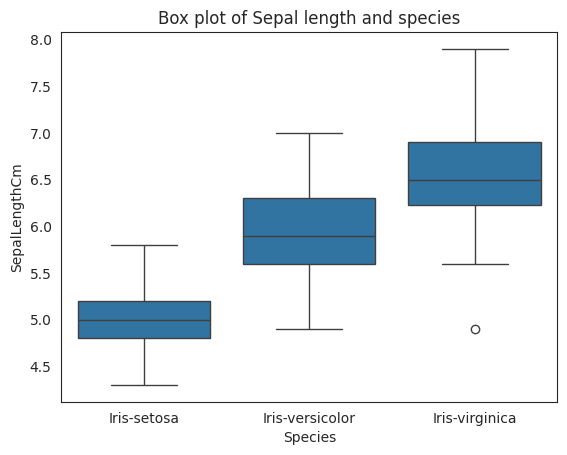

In [35]:
sns.boxplot(x='Species',y='SepalLengthCm',data=df,)
plt.title('Box plot of Sepal length and species')
plt.show()

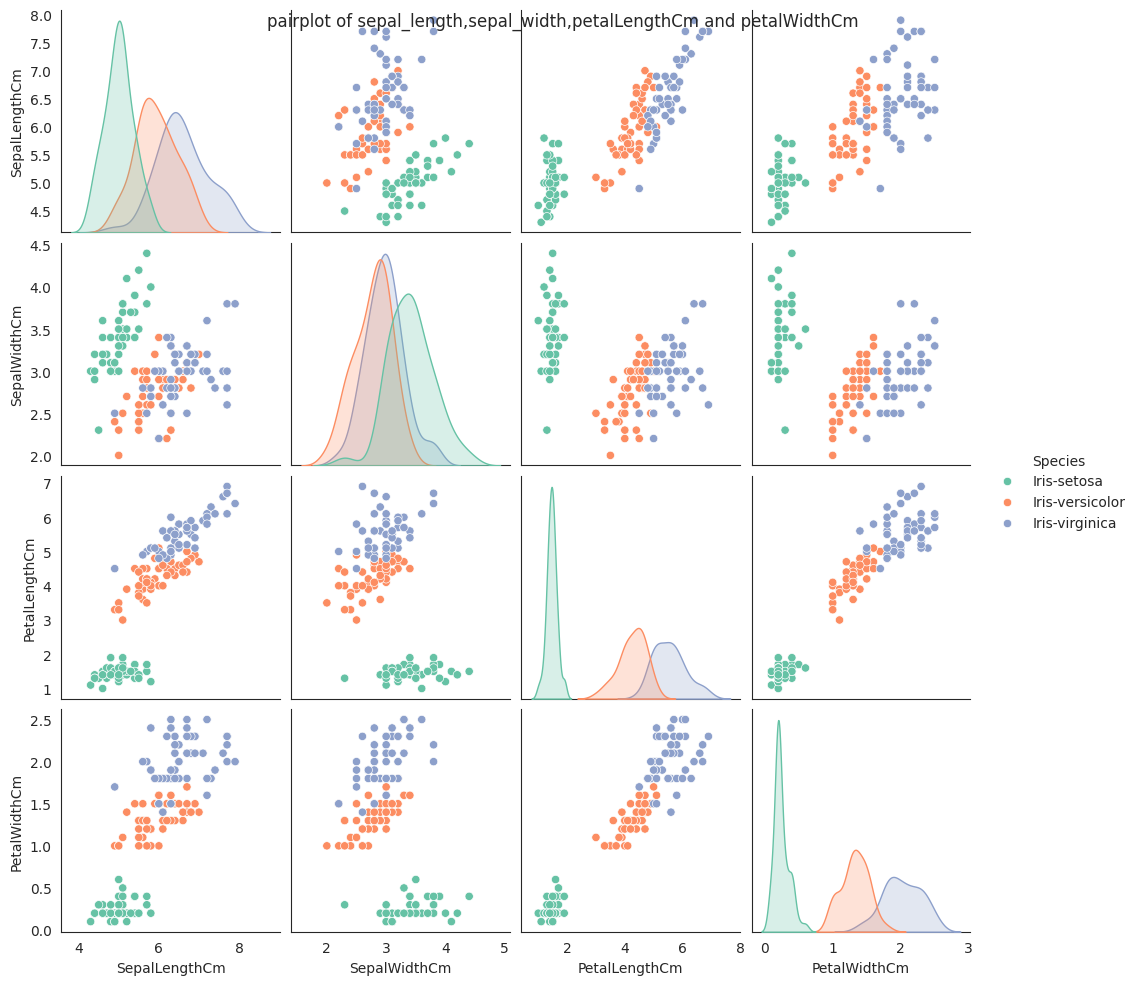

In [44]:
columns_to_visualize=['SepalLengthCm','SepalWidthCm','PetalLengthCm',
                      'PetalWidthCm','Species']
sns.pairplot(df[columns_to_visualize],hue='Species',palette='Set2')
plt.suptitle("pairplot of sepal_length,sepal_width,petalLengthCm and petalWidthCm")
plt.show()

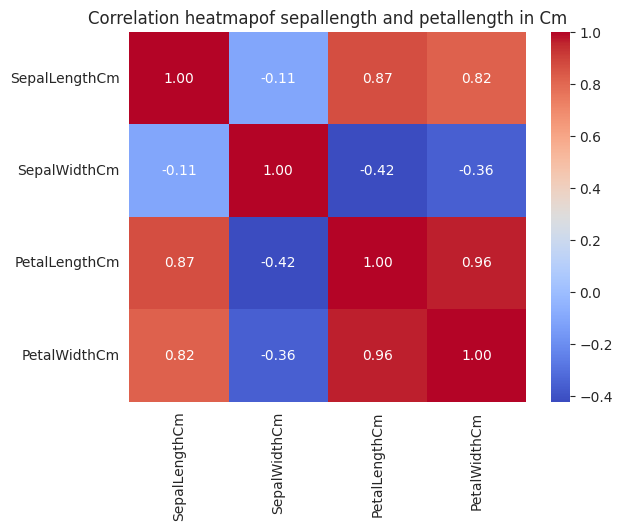

In [55]:
columns_to_visualize= ['SepalLengthCm','SepalWidthCm','PetalLengthCm',
                       'PetalWidthCm']
correlation_matrix=df[columns_to_visualize].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmapof sepallength and petallength in Cm')
plt.show()

In [71]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x=df.drop('Species',axis=1)
y=df['Species']
print(x.head)
print(y.head)
print(x.shape)
print(type(x))

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]>
<bound method NDFrame.head of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
 

In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(df.Species)
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [72]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,
                                                  random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 5)
(30, 5)
(120,)
(30,)


In [74]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
svm_model=make_pipeline(StandardScaler(),SVC(kernel='linear', probability=True))
random_forest_model=RandomForestClassifier(n_estimators=100, random_state=42)